# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [1]:
import pandas as pd

## imports for Python, Pandas

In [2]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [3]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [4]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

C:\anaconda3\envs\mec-miniprojects\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [5]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

C:\anaconda3\envs\mec-miniprojects\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


,name,population,state,shortname,info.governor
0,Dade,12345,Florida,FL,Rick Scott
1,Broward,40000,Florida,FL,Rick Scott
2,Palm Beach,60000,Florida,FL,Rick Scott
3,Summit,1234,Ohio,OH,John Kasich
4,Cuyahoga,1337,Ohio,OH,John Kasich


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [6]:
# load json as string
#json.load((open('data/world_bank_projects_less.json')))

In [7]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Name': 'Education for all', 'Percent': 100}","[{'name': 'Education for all', 'code': '65'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Name': 'Other economic management', 'Percent...","[{'name': 'Other economic management', 'code':...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,


In [8]:
json_file_wb = json.load((open('data/world_bank_projects.json')))
world_bank_df = pd.read_json('data/world_bank_projects.json')

In [9]:
world_bank_df.head(5)

,sector,supplementprojectflg,projectfinancialtype,prodline,mjtheme,idacommamt,impagency,project_name,mjthemecode,closingdate,...,majorsector_percent,board_approval_month,theme_namecode,countryname,url,source,projectstatusdisplay,ibrdcommamt,sector_namecode,_id
0,"[{'Name': 'Primary education'}, {'Name': 'Seco...",N,IDA,PE,[Human development],130000000,MINISTRY OF EDUCATION,Ethiopia General Education Quality Improvement...,"8,11",2018-07-07T00:00:00Z,...,"[{'Percent': 46, 'Name': 'Education'}, {'Perce...",November,"[{'code': '65', 'name': 'Education for all'}]",Federal Democratic Republic of Ethiopia,http://www.worldbank.org/projects/P129828/ethi...,IBRD,Active,0,"[{'code': 'EP', 'name': 'Primary education'}, ...",{'$oid': '52b213b38594d8a2be17c780'}
1,[{'Name': 'Public administration- Other social...,N,OTHER,RE,"[Economic management, Social protection and ri...",0,MINISTRY OF FINANCE,TN: DTF Social Protection Reforms Support,"1,6",NaN,...,"[{'Percent': 70, 'Name': 'Public Administratio...",November,"[{'code': '24', 'name': 'Other economic manage...",Republic of Tunisia,http://www.worldbank.org/projects/P144674?lang=en,IBRD,Active,0,"[{'code': 'BS', 'name': 'Public administration...",{'$oid': '52b213b38594d8a2be17c781'}
2,[{'Name': 'Rural and Inter-Urban Roads and Hig...,Y,IDA,PE,"[Trade and integration, Public sector governan...",6060000,MINISTRY OF TRANSPORT AND COMMUNICATIONS,Tuvalu Aviation Investment Project - Additiona...,"5,2,11,6",NaN,...,"[{'Percent': 100, 'Name': 'Transportation'}]",November,"[{'code': '47', 'name': 'Regional integration'...",Tuvalu,http://www.worldbank.org/projects/P145310?lang=en,IBRD,Active,0,"[{'code': 'TI', 'name': 'Rural and Inter-Urban...",{'$oid': '52b213b38594d8a2be17c782'}
3,[{'Name': 'Other social services'}],N,OTHER,RE,"[Social dev/gender/inclusion, Social dev/gende...",0,LABOR INTENSIVE PUBLIC WORKS PROJECT PMU,Gov't and Civil Society Organization Partnership,"7,7",NaN,...,"[{'Percent': 100, 'Name': 'Health and other so...",October,"[{'code': '57', 'name': 'Participation and civ...",Republic of Yemen,http://www.worldbank.org/projects/P144665?lang=en,IBRD,Active,0,"[{'code': 'JB', 'name': 'Other social services'}]",{'$oid': '52b213b38594d8a2be17c783'}
4,[{'Name': 'General industry and trade sector'}...,N,IDA,PE,"[Trade and integration, Financial and private ...",13100000,MINISTRY OF TRADE AND INDUSTRY,Second Private Sector Competitiveness and Econ...,"5,4",2019-04-30T00:00:00Z,...,"[{'Percent': 50, 'Name': 'Industry and trade'}...",October,"[{'code': '45', 'name': 'Export development an...",Kingdom of Lesotho,http://www.worldbank.org/projects/P144933/seco...,IBRD,Active,0,"[{'code': 'YZ', 'name': 'General industry and ...",{'$oid': '52b213b38594d8a2be17c784'}


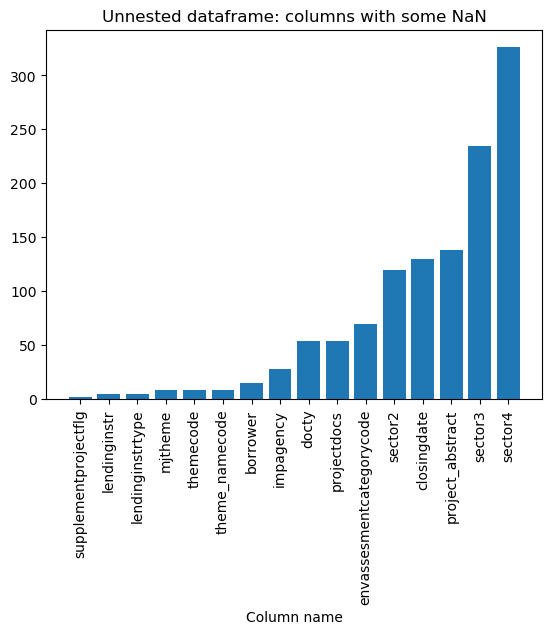

In [10]:
import matplotlib.pyplot as plt

wb_na_found = pd.DataFrame(world_bank_df.isna().sum()).reset_index().rename(columns={"index":"column_name", 0:"number_of_NaN"})

wb_na_cols = wb_na_found[wb_na_found['number_of_NaN']!=0].sort_values(by="number_of_NaN", ascending=True)

plt.bar(x=wb_na_cols['column_name'], height=wb_na_cols['number_of_NaN'])
plt.xlabel("Column name")
plt.title("Unnested dataframe: columns with some NaN")
plt.xticks(rotation=90)
plt.show()

### 1. Find the 10 countries with most projects

Note: why is Africa listed as a country?

It seems that these entries are under country code 3A, which is not an official ISO alpha-2 code

https://en.wikipedia.org/wiki/ISO_3166-1_alpha-2


In [11]:
world_bank_df.groupby(['regionname','countryname','countrycode'])['status'].count().reset_index().sort_values(by='status', ascending=False).rename(columns={'status':"Project Count"}).iloc[0:10]

,regionname,countryname,countrycode,Project Count
49,East Asia and Pacific,People's Republic of China,CN,19
50,East Asia and Pacific,Republic of Indonesia,ID,19
57,East Asia and Pacific,Socialist Republic of Vietnam,VN,17
115,South Asia,Republic of India,IN,16
106,Middle East and North Africa,Republic of Yemen,RY,13
101,Middle East and North Africa,Kingdom of Morocco,MA,12
114,South Asia,People's Republic of Bangladesh,BD,12
113,South Asia,Nepal,NP,12
0,Africa,Africa,3A,11
25,Africa,Republic of Mozambique,MZ,11


### 2. Find the top 10 major project themes (using column 'mjtheme_namecode')


In [12]:
# Form dataframe
extract_project_code_name = pd.json_normalize(data=json_file_wb, record_path=['mjtheme_namecode'], 
                            meta=['_id'])

extract_project_code_name.rename(columns={"name":"project_name", "code":"project_code"}, inplace=True)

extract_project_code_name

,project_code,project_name,_id
0,8,Human development,{'$oid': '52b213b38594d8a2be17c780'}
1,11,,{'$oid': '52b213b38594d8a2be17c780'}
2,1,Economic management,{'$oid': '52b213b38594d8a2be17c781'}
3,6,Social protection and risk management,{'$oid': '52b213b38594d8a2be17c781'}
4,5,Trade and integration,{'$oid': '52b213b38594d8a2be17c782'}
...,...,...,...
1494,10,Rural development,{'$oid': '52b213b38594d8a2be17c972'}
1495,9,Urban development,{'$oid': '52b213b38594d8a2be17c973'}
1496,8,Human development,{'$oid': '52b213b38594d8a2be17c973'}
1497,5,Trade and integration,{'$oid': '52b213b38594d8a2be17c973'}


#### We notice that the column '_id' is still nested.

#### Let's fix that.

In [13]:
def get_id_from_dict(x):
    
    return x['$oid']

In [14]:
extract_project_code_name['_id'] = extract_project_code_name['_id'].apply(lambda x: get_id_from_dict(x))

extract_project_code_name

,project_code,project_name,_id
0,8,Human development,52b213b38594d8a2be17c780
1,11,,52b213b38594d8a2be17c780
2,1,Economic management,52b213b38594d8a2be17c781
3,6,Social protection and risk management,52b213b38594d8a2be17c781
4,5,Trade and integration,52b213b38594d8a2be17c782
...,...,...,...
1494,10,Rural development,52b213b38594d8a2be17c972
1495,9,Urban development,52b213b38594d8a2be17c973
1496,8,Human development,52b213b38594d8a2be17c973
1497,5,Trade and integration,52b213b38594d8a2be17c973


In [15]:
counts = extract_project_code_name.groupby("project_name")['_id'].count().reset_index().rename(columns={"_id":"count"})
sorted_counts = counts.sort_values(by='count', ascending=False)

# Ignore counts of cases in which project name is not found
top_ten = sorted_counts[sorted_counts['project_name']!=""].iloc[0:10]

top_ten

,project_name,count
2,Environment and natural resources management,223
7,Rural development,202
4,Human development,197
5,Public sector governance,184
9,Social protection and risk management,158
3,Financial and private sector development,130
8,Social dev/gender/inclusion,119
10,Trade and integration,72
11,Urban development,47
1,Economic management,33


### 3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [16]:
non_blank_rows = extract_project_code_name[extract_project_code_name['project_name']!=""]

# get unique code: name combinations
unique_code_name = non_blank_rows[['project_code','project_name']].drop_duplicates()

# Turn pairs of code and names into a dictionary
code_name_dictionary = pd.Series(unique_code_name.project_name.unique(), unique_code_name.project_code.unique()).to_dict()

In [17]:
filled_in_project_name = extract_project_code_name.copy()

# Map code:names to rest of dataframe
filled_in_project_name['project_name'] = filled_in_project_name['project_code'].map(code_name_dictionary)

In [18]:
filled_in_project_name

,project_code,project_name,_id
0,8,Human development,52b213b38594d8a2be17c780
1,11,Environment and natural resources management,52b213b38594d8a2be17c780
2,1,Economic management,52b213b38594d8a2be17c781
3,6,Social protection and risk management,52b213b38594d8a2be17c781
4,5,Trade and integration,52b213b38594d8a2be17c782
...,...,...,...
1494,10,Rural development,52b213b38594d8a2be17c972
1495,9,Urban development,52b213b38594d8a2be17c973
1496,8,Human development,52b213b38594d8a2be17c973
1497,5,Trade and integration,52b213b38594d8a2be17c973


In [19]:
counts_filled = filled_in_project_name.groupby("project_name")['_id'].count().reset_index().rename(columns={"_id":"count"})
sorted_counts_filled = counts_filled.sort_values(by='count', ascending=False)

# Ignore counts of cases in which project name is not found
top_ten_after_clean = sorted_counts_filled.iloc[0:10]

top_ten_after_clean

,project_name,count
1,Environment and natural resources management,250
6,Rural development,216
3,Human development,210
4,Public sector governance,199
8,Social protection and risk management,168
2,Financial and private sector development,146
7,Social dev/gender/inclusion,130
9,Trade and integration,77
10,Urban development,50
0,Economic management,38


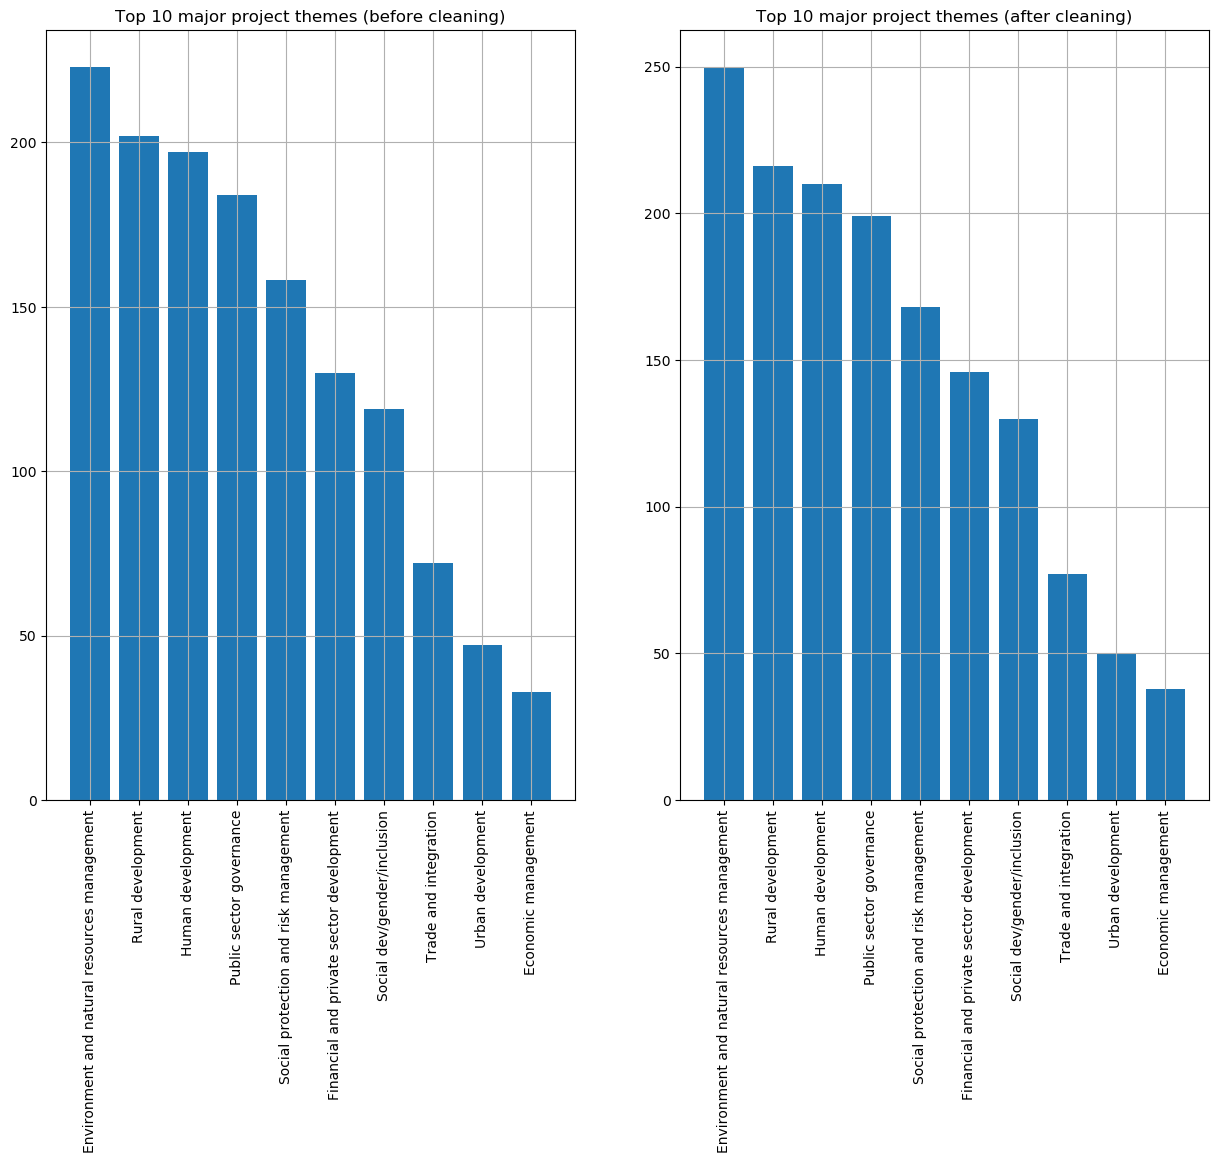

In [20]:
fig = plt.figure(figsize=(15,10))

plt.subplot(1, 2, 1)
plt.bar(x=top_ten['project_name'], height=top_ten['count'])
plt.title("Top 10 major project themes (before cleaning)")
plt.xticks(rotation=90)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.bar(x=top_ten_after_clean['project_name'], height=top_ten_after_clean['count'])
plt.title("Top 10 major project themes (after cleaning)")
plt.xticks(rotation=90)
plt.grid(True)



plt.show()